In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py
%matplotlib notebook
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import dm_search
from likelihood_calculator import auxiliary_functions as aux

lc_i = likelihood_analyser.LikelihoodAnalyser()
DManalyzer = dm_search.DMAnalyser()

### Load data

In [254]:
dirname = r'/data/new_trap/20200107/Bead3/Shaking/Shaking340/'
bdfs_340 = load_dir(dirname=dirname, file_prefix='Shaking8')

100  files in folder
100  files loaded


In [220]:
dirname = r'/data/new_trap/20200107/Bead3/Shaking/Shaking380/'
bdfs_380 = load_dir(dirname=dirname, file_prefix='Shaking4')

99  files in folder
99  files loaded


In [192]:
aux.voltage_to_position(np.mean(bdfs_380[3].cant_pos[0]))

340.21559147436267

<IPython.core.display.Javascript object>


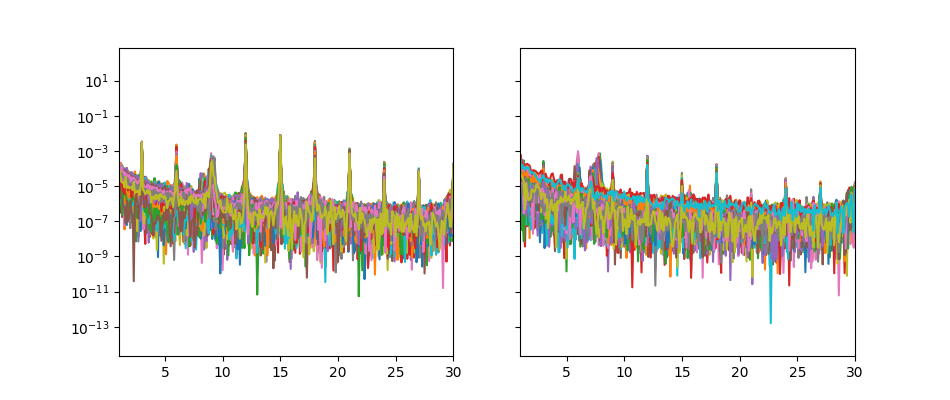

In [295]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True, sharey=True)
_ = [ax[0].semilogy(*bb.psd2('x')) for bb in bdfs_380]
ax[0].set(xlim=(1,30))
_ = [ax[1].semilogy(*bb.psd2('x')) for bb in bdfs_340]

In [292]:
harm_13 = []
z_fb = []
y = []
for bb in bdfs_380:
    freq,psd = bb.psd2('x')
    harm_13.append(np.sqrt(psd[freq==6]))
    y.append(np.mean(bb.x2))
    z_fb.append(np.mean(bb.feedback[2]))
y = np.array(y)

In [293]:
y_um = y/4.3e-4*2e-17/1e-7*np.sqrt(10)
np.max(y_um)-np.min(y_um)

1.7567033176552452e-08

<IPython.core.display.Javascript object>


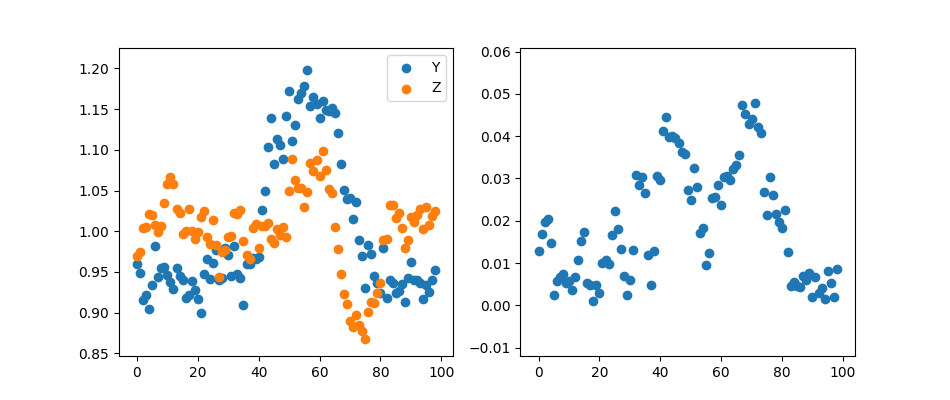

In [294]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
ax[1].scatter(range(99), harm_13)
ax[0].scatter(range(99), y/np.mean(y),label='Y')
# ax[0].set(ylim=(1e-8,1e-7))
ax[0].scatter(range(99), z_fb/np.mean(z_fb),label='Z')
ax[0].legend()

In [255]:
harm_13 = []
z_fb = []
y = []
for bb in bdfs_340:
    freq,psd = bb.psd2('x')
    harm_13.append(np.sqrt(psd[freq==9]))
    y.append(np.mean(bb.y2))
    z_fb.append(np.mean(bb.feedback[2]))

<IPython.core.display.Javascript object>


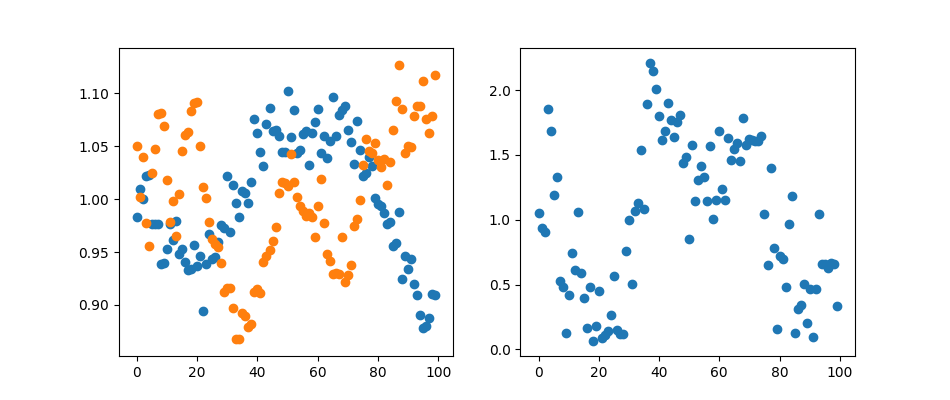

In [256]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
ax[1].scatter(range(100), harm_13/np.mean(harm_13))
ax[0].scatter(range(100), y/np.mean(y))
ax[0].scatter(range(100), z_fb/np.mean(z_fb))